In [1]:
#Imported liraries for this file
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
#Loading the data
original_car_file = pd.read_csv('/Users/tanner/Downloads/car_data.csv')

In [3]:
#First glimpse of the data's general info
print(original_car_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

We see that there are some potential features that need to be modified. 

The features that contain null values:
- VehicleType
- Gearbox
- Model
- FuelType
- NotRepaired

The features with potentially unusual data types for the information that they contain:
- DateCrawled --> Change to datetime
- DateCreated --> Change to datetime
- LastSeen --> Change to datetime

It is certainly possible that there are other features types that need to be changed during encoding, but these are the most obvious types that need to be changed. In addition, most--if not all-- features will be individually inspected to ensure the feature is cleaned for upcoming model usage.

# Helper Functions

In [4]:
"""This function prints general information for arbitrary series and dataframe"""

def feature_summary(object):

    #If the object is a series
    if isinstance(object, pd.Series):
        #First five entires of the object
        print("First five entries:")
        print(object.head(5))
        print("")

        #Statistical information
        print("General statistical info:")
        print(object.describe())
        print("\n")

        #General information
        print("General info:")
        print(object.info())
        print("\n")

        #Number of unique values
        unique_values = object.nunique(dropna= False)
        print(f'Number of unique values: {unique_values}')
        print("\n")

        #Null values
        null_values = object.isnull().sum()
        percent_null = ((null_values) / (len(object))) * 100 
        print(f'Number of null values: {null_values} \n')
        print(f'Percetage of Null Values: {percent_null:.2f} %')
        print("\n")
        

    #If the object is a dataframe
    elif isinstance(object, pd.DataFrame):
        #For loop runs through all columns
        for col in object.columns:
            #First five entries
            print("First five entries")
            print(object[col].head(5))
            print("\n")
            
            #General statistical info
            print(f'\n=== Column: {col} ===')
            print('General statistic info:')
            print(object[col].describe())
            print("\n")

            #General information
            print("General info:")
            print(object.info())
            print("\n")

            #Number of unique values
            unique_values = object[col].nunique(dropna = False)
            print(f'Number of unique values: {unique_values}')
            print

            #Null values
            null_values = object[col].isnull().sum()
            percent_null = ((null_values) / (len(object[col]))) * 100
            print(f'Number of null values: {null_values} \n')
            print(f'Percentage of Null Values: {percent_null:.2f} %')

    #If the object is neither a series nor a dataframe
    else:
        print("The input must be a pandas Series or DataFrame.")


"""This function helpes to impute medians with the Power Column in the Data PreProcessing section"""

def power_median_imputation(dataframe, medians):
    #Here we merge the medians into the dataframe
    dataframe = dataframe.merge(medians, on=['Brand', 'Model'], how='left')

    #Now we fill the missing Power_Imputed values using the brand_model_medians medians
    dataframe['Power_Imputed'] = dataframe['Power_Imputed'].fillna(dataframe['MedianPower'])

    #The helper column can be dropped
    dataframe = dataframe.drop(columns=['MedianPower'])




# Minor Data Preprocessing

Before we edit the original CSV file, we will create a copy of it to begin editing our data.

In [5]:
#Creating a copy of 'original_car_file' so that we can make edits to it
minor_preprocessed_car_file = original_car_file.copy(deep=True)

## DateCrawled Feature

Here are the first few entries of the *DateCrawled* column.

In [6]:
#First few entries of the DateCrawled Column
print(minor_preprocessed_car_file['DateCrawled'].head(5))

0    24/03/2016 11:52
1    24/03/2016 10:58
2    14/03/2016 12:52
3    17/03/2016 16:54
4    31/03/2016 17:25
Name: DateCrawled, dtype: object


Let's convert this feature to datetime type. This way we can easily information from the dates if need be.

In [7]:
#Converting DateCrawled to datetime type
minor_preprocessed_car_file['DateCrawled'] = pd.to_datetime(minor_preprocessed_car_file['DateCrawled'], format='%d/%m/%Y %H:%M')

#Ensuring the change worked
print(minor_preprocessed_car_file['DateCrawled'].info())
print(minor_preprocessed_car_file['DateCrawled'].head(5))

<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: DateCrawled
Non-Null Count   Dtype         
--------------   -----         
354369 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None
0   2016-03-24 11:52:00
1   2016-03-24 10:58:00
2   2016-03-14 12:52:00
3   2016-03-17 16:54:00
4   2016-03-31 17:25:00
Name: DateCrawled, dtype: datetime64[ns]


Since there are no null values in this feature, we can move onto the next feature.

## DateCreated Feature

Here are the first entries of the DateCreated feature.

In [8]:
#First 10 entries of the DateCreated feature
print(minor_preprocessed_car_file['DateCreated'].head(10))

0    24/03/2016 00:00
1    24/03/2016 00:00
2    14/03/2016 00:00
3    17/03/2016 00:00
4    31/03/2016 00:00
5    04/04/2016 00:00
6    01/04/2016 00:00
7    21/03/2016 00:00
8    04/04/2016 00:00
9    17/03/2016 00:00
Name: DateCreated, dtype: object


We see that all of the hours and minutes corresponding to each car is set to zero. This is likely something to be corrected later on. For now, we will convert this column to datetime. 

In [9]:
#Converting DateCreated to datetime type
minor_preprocessed_car_file['DateCreated'] = pd.to_datetime(minor_preprocessed_car_file['DateCreated'], format='%d/%m/%Y %H:%M')

#Ensuring the change was made
print(minor_preprocessed_car_file['DateCreated'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: DateCreated
Non-Null Count   Dtype         
--------------   -----         
354369 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None


## LastSeen Feature

In [10]:
#First five entries of the LastSeen feature
print(minor_preprocessed_car_file['LastSeen'].head(5))

0    07/04/2016 03:16
1    07/04/2016 01:46
2    05/04/2016 12:47
3    17/03/2016 17:40
4    06/04/2016 10:17
Name: LastSeen, dtype: object


Similar to the DateCreated and DateCrawled features, we need to change this to datetime type.

In [11]:
#Converting LastSeen to datetime type
minor_preprocessed_car_file['LastSeen'] = pd.to_datetime(minor_preprocessed_car_file['LastSeen'], format='%d/%m/%Y %H:%M')

#Ensuring the changes were made
print(minor_preprocessed_car_file['LastSeen'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: LastSeen
Non-Null Count   Dtype         
--------------   -----         
354369 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None


# Initial Exploratory Data Analysis

In this section we perform basic analysis on the features that we may use. Ultimately, we should acquire a better understanding of the data and what we need to format within it for better model performance, readability, et cetera.

## Analysis on DateCrawled

Here is some basic information on the DateCrawled feature as well as the first few entries of the column. Since each timestamp is unique with respect to its hours and minutes, we are going to floor the hour and minutes to zero so that we solely get the date to sort data by, but still maintaining the datetime type which is useful if we want to use datetime methods in future analysis or preprocessing.

In [12]:
#We remove the hours and minutes in a copy of the DateCrawled column. This enables us to have better general info below.
#First, let's us copy the DateCrawled column
datecrawled_copy = minor_preprocessed_car_file['DateCrawled'].copy(deep=True)

#Now we floor the hours and minutes
datecrawled_copy = datecrawled_copy.dt.floor('D')

#Information about DateCrawled
feature_summary(datecrawled_copy)

First five entries:
0   2016-03-24
1   2016-03-24
2   2016-03-14
3   2016-03-17
4   2016-03-31
Name: DateCrawled, dtype: datetime64[ns]

General statistical info:
count                           354369
mean     2016-03-20 21:16:58.440100608
min                2016-03-05 00:00:00
25%                2016-03-13 00:00:00
50%                2016-03-21 00:00:00
75%                2016-03-29 00:00:00
max                2016-04-07 00:00:00
Name: DateCrawled, dtype: object


General info:
<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: DateCrawled
Non-Null Count   Dtype         
--------------   -----         
354369 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None


Number of unique values: 34


Number of null values: 0 

Percetage of Null Values: 0.00 %




The range of dates is March 5th to April 7th, a fairly short range. In addition, we have 34 unique value with no null entries. Let's visualize the distribution of this column by sorting the dates from greatest to lowest frequency. This will enable us to see which dates had greatest number of car profiles.

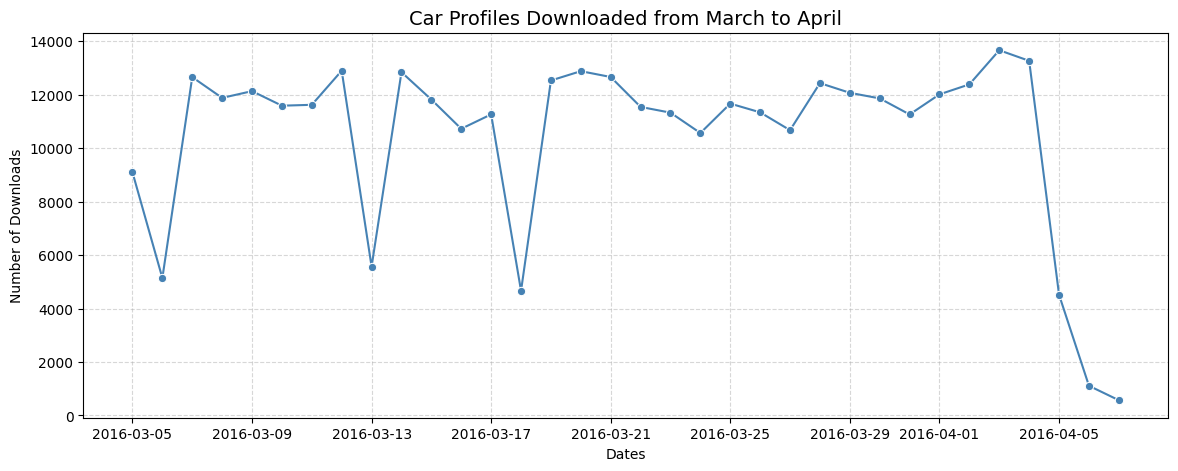

In [13]:
#Figure size and figure type
plt.figure(figsize=(14,5))

#We remove the hour and miute specifier and list the frequency with each corresponding date
daily_counts = minor_preprocessed_car_file['DateCrawled'].dt.date.value_counts().sort_index()

#Figure type
sns.lineplot(x = daily_counts.index, y = daily_counts.values, color='steelblue', marker='o')

#Figure's Title
plt.title('Car Profiles Downloaded from March to April', fontsize = 14)

#Figure's x and y axis' labels
plt.xlabel('Dates')
plt.ylabel('Number of Downloads')

#Figure's Grid
plt.grid(True, linestyle = '--', alpha = 0.5)

#Results
plt.show()

The car profiles have fairly constant download rates, though there are certain dips throughout the month.  Since the downloads are relatively uniform, analyzing our data should be easier since each day has similar car profile totals associated with them. In fact, the hours and minutes will likely be irrelevant to use in our model training so we are going to rid of the hours and minute by flooring them down. Since there are no peculiar recordings in this feature, we can move onto the next feature.

## Analysis on VehicleType

Here we perform analysis on 'VehicleType'. VehicleType simply describes the type of vehicle in the car profile such as a sedan or an SUV. Here is basic information on this feature.

In [14]:
#Information about VehicleType
feature_summary(minor_preprocessed_car_file['VehicleType'])

First five entries:
0      NaN
1    coupe
2      suv
3    small
4    small
Name: VehicleType, dtype: object

General statistical info:
count     316879
unique         8
top        sedan
freq       91457
Name: VehicleType, dtype: object


General info:
<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: VehicleType
Non-Null Count   Dtype 
--------------   ----- 
316879 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB
None


Number of unique values: 9


Number of null values: 37490 

Percetage of Null Values: 10.58 %




This feature has 8 unique values so we will check the distribution to see if the distribution is varied of if there is high imbalance. Also in this feature we have 37490 null values, which will need to be addressed in the data preprocessing. Let's visualize the distribution of this feature now.

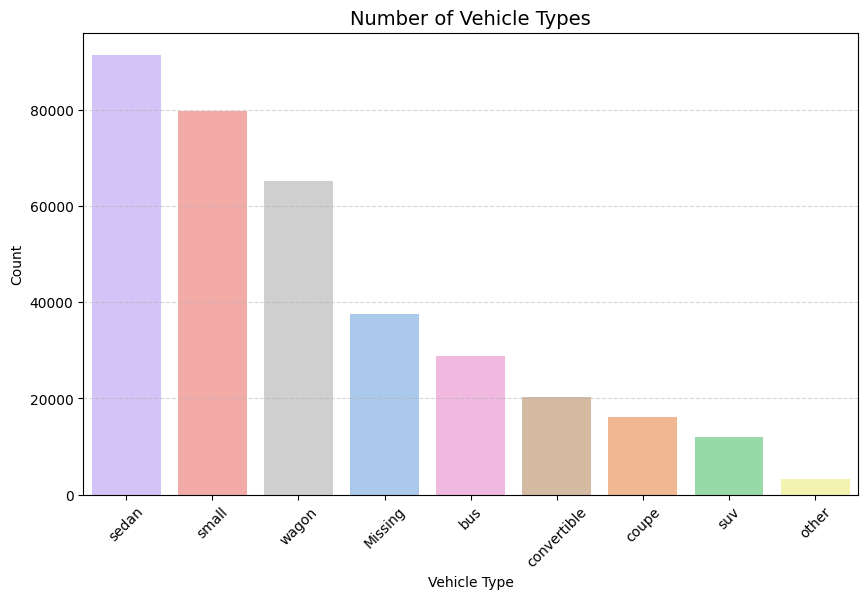

In [15]:
#Replacing NaN values with a label
copy_df = minor_preprocessed_car_file.copy(deep = True)
copy_df['VehicleType'] = copy_df['VehicleType'].fillna('Missing')

#Creating the plot
plt.figure(figsize=(10,6))
sns.countplot(data = copy_df, x = 'VehicleType', order = copy_df['VehicleType'].value_counts().index, palette='pastel', hue = 'VehicleType', legend = False)

#Plot Labels
plt.title("Number of Vehicle Types", fontsize = 14)
plt.xlabel("Vehicle Type")
plt.ylabel("Count")

#Plot Formatting
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle='--', alpha = 0.5)

#Results
plt.show()

Many of the listings are concentrated into a few vehicle types, while other vehicle types appear less frequently. Knowing the data was sorted from greatest to least in terms of count, this distribution is clearly right-skewed with a long tail. In addition, the 'Missing' category is the 4th most populated category. Since it compromises much of the data, we will institute the null values as its own category in the dataframe as 'missing'. This will be performed in the Data Preprocessing section.

## Analysis on RegistrationYear

In [16]:
#Information about RegistrationYear
feature_summary(minor_preprocessed_car_file['RegistrationYear'])

First five entries:
0    1993
1    2011
2    2004
3    2001
4    2008
Name: RegistrationYear, dtype: int64

General statistical info:
count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64


General info:
<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: RegistrationYear
Non-Null Count   Dtype
--------------   -----
354369 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB
None


Number of unique values: 151


Number of null values: 0 

Percetage of Null Values: 0.00 %




This feature has 151 unique values, none of them being null values. However, there are registration years that are clearly out of range for RegistrationYear. For example, the year 1000 does not make sense nor does the year 9999. Thus, we will need to filter them out when we are visualizing our distribution since they are clearly outliers. Specifically, will filter out any car older than 1950 and newer than 2020. Moreover, we will calculate how many rows were dropped in order to get distribution that we will plot below.

In [17]:
#Number of rows dropped after the filtering
invalid_years = minor_preprocessed_car_file[(minor_preprocessed_car_file['RegistrationYear'] < 1950) | (minor_preprocessed_car_file['RegistrationYear'] > 2020)]
row_removed_percentage = len(invalid_years) / len(minor_preprocessed_car_file['RegistrationYear'])

#Result
print(f'Invalid years removed: {len(invalid_years)}')
print(f'Percent of rows removed: {row_removed_percentage * 100: .2f} %')

Invalid years removed: 351
Percent of rows removed:  0.10 %


Clearly the number of rows within these invalid years is considerably small compared to the overall size of the RegistrationYear feature. We may remove these rows completely in the Data Preprocessing section. Down below is the distribution of this feature with the filtered years.

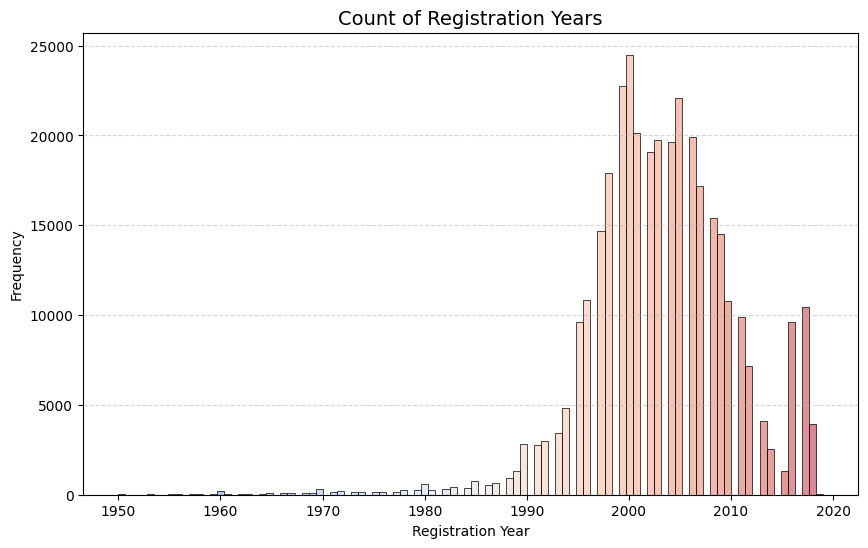

In [18]:
#Filter for valid years
valid_years = minor_preprocessed_car_file[(minor_preprocessed_car_file['RegistrationYear'] >= 1950) & (minor_preprocessed_car_file['RegistrationYear'] <= 2020)]

#Plot size
plt.figure(figsize=(10,6))

#Histogram setup
sns.histplot(data=valid_years, x='RegistrationYear', bins = 100, palette='coolwarm', hue='RegistrationYear', legend=False)

#Histogram formatting
plt.title('Count of Registration Years', fontsize=14)
plt.xlabel('Registration Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


This is a left-skewed, unimodal distribution whose greatest concentration of values lie in the years of 1999 to 2008, which correspond to the first and third quartiles respectively. The reasons for the cars contained within the tail (earlier / classic cars) are unknown; however, the used car market may have not been so established as it has been in recent years. Additionally, classic cars tend to be occupied in more niche markets since their pricing likely depends on different factors than those influencing modern, used cars. Moreover, regarding the dip in the newer, used cars is likely a consequence of more time needed before individuals want to sell the newer cars. Regardless, since 0.10% of rows are removed with this filtration, we will perform this change in the Data PreProcessing. 

## Analysis on Gearbox

This section is an analysis on the Gearbox feature. This represents the kind of Gearbox / transmission type for each sample in the dataframe. Down below is some general information about this feature.

In [19]:
feature_summary(minor_preprocessed_car_file['Gearbox'])

First five entries:
0    manual
1    manual
2      auto
3    manual
4    manual
Name: Gearbox, dtype: object

General statistical info:
count     334536
unique         2
top       manual
freq      268251
Name: Gearbox, dtype: object


General info:
<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: Gearbox
Non-Null Count   Dtype 
--------------   ----- 
334536 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB
None


Number of unique values: 3


Number of null values: 19833 

Percetage of Null Values: 5.60 %




There are two unique, valid entries in our Gearbox feature with 19833 null values, which is roughly 5.6% of the data. Since 5.6% is a decent portion of the data and imputation with the other two valid entires could cause misrepresentation of the data, creating a 'missing' category for the null values seem appropriate. It is possible that the null values could have some other meaning than what fits into 'auto' and 'manual'. Down below is a visualization of the distribution for this feature, which could provide deeper insight.

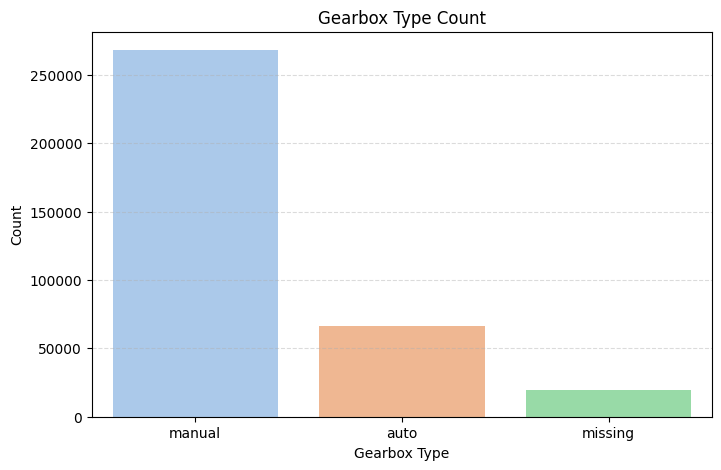

In [20]:
#Copy of the dataframe
gearbox_copy = minor_preprocessed_car_file.copy(deep=True)

#Filling missing values with 'missing'
gearbox_copy['Gearbox'] = gearbox_copy['Gearbox'].fillna('missing')

#Figure size
plt.figure(figsize=(8,5))

#Figure type and setup
sns.countplot(data=gearbox_copy, x='Gearbox', palette='pastel', hue='Gearbox', legend=False)

#Figure add-ons
plt.title("Gearbox Type Count")
plt.xlabel("Gearbox Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha = 0.45)

#Results
plt.show()

We see that manual cars dominate this dataframe. Though there is certainly imbalance amongst these categories, since it is the target of our project, having imbalance is perfectly fine. Thus, in the Data PreProcessing section, we will map the null values to the 'missing' string and create its own category.

## Analysis of Power

Here we perform analysis on the Power feature, which represents the horsepower (HP) of each car within our dataframe. Down below is general information about this feature.

In [21]:
#General information about the power column
feature_summary(minor_preprocessed_car_file['Power'])

First five entries:
0      0
1    190
2    163
3     75
4     69
Name: Power, dtype: int64

General statistical info:
count    354369.000000
mean        110.094337
std         189.850405
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64


General info:
<class 'pandas.core.series.Series'>
RangeIndex: 354369 entries, 0 to 354368
Series name: Power
Non-Null Count   Dtype
--------------   -----
354369 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB
None


Number of unique values: 712


Number of null values: 0 

Percetage of Null Values: 0.00 %




We have 712 unique, valid entires in our Power feature with no invalid entries. However, based off the information above, we have values that are unrealistic in the context of the horsepower for used cars. The minimum value is 0 horsepower and the maximum value is 20000 horsepower. Clearly, these are outliers in our data so there will likely need to be some form of filtering in this feature. Looking at the first quartile, 69 horsepower, to the third quartile, 143 horsepower, is a realistic range of horsepowers for used, modern vehicles. Thus, this could be a reasonable filter to impose on this feature in the Preprocessing of this column. Additionally, the standard deviation is 189, which is extremely high. After the filtering, the standard deviation should lower considerably. We will visualize the distribution of the data to see if any deeper insight can be contrived. 

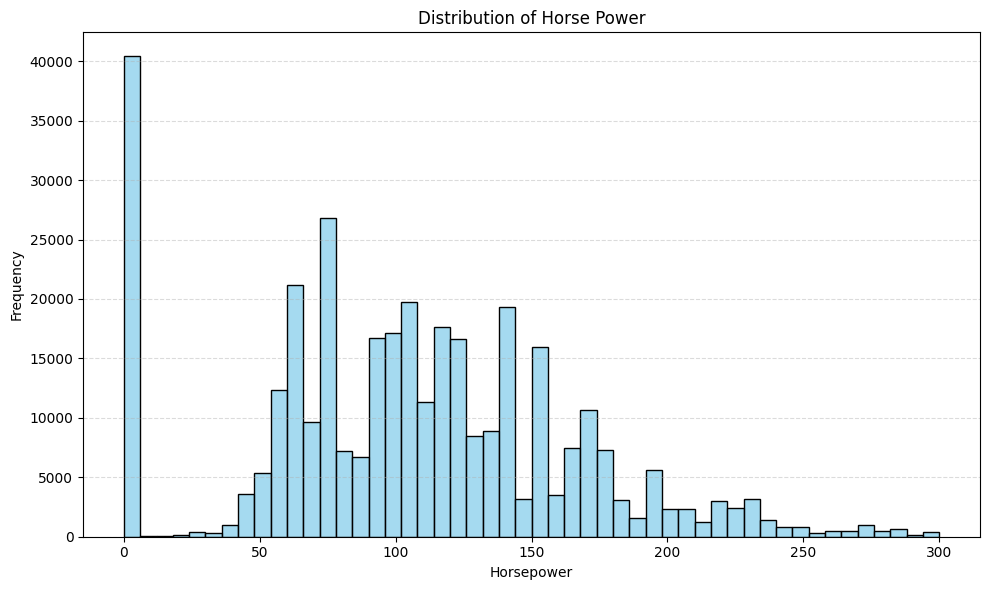

In [22]:
#Copy of dataframe
power_copy = minor_preprocessed_car_file['Power'].copy(deep=True)

#Filter mask
power_mask = power_copy <= 300

#Applying mask
filtered_copy = power_copy[power_mask]

#Plot size
plt.figure(figsize=(10,6))

#Plot type and setup
sns.histplot(x=filtered_copy, bins = 50, color='skyblue', edgecolor = 'black')

#Plot add-ons
plt.title("Distribution of Horse Power")
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle='--', alpha = 0.45)

#Output
plt.tight_layout()
plt.show()

Clearly, zero horsepower is the dominate value in this distribution, which will need to be dealt with in the preprocessing. First, we filter out the zero, plot the distribution, and make inferences from it. Afterwards, the zeros can be handled.

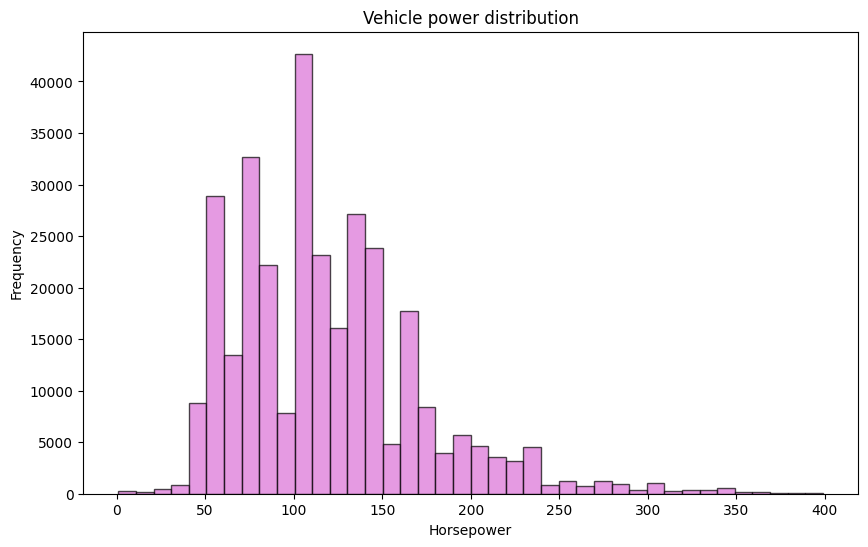

In [23]:
zero_power = minor_preprocessed_car_file[
    (minor_preprocessed_car_file['Power'] > 0) &
    (minor_preprocessed_car_file['Power'] < 400)
]

#Plot
plt.figure(figsize=(10,6))
plt.hist(zero_power['Power'], bins = 40, color='orchid', edgecolor='black', alpha=0.7)
plt.title("Vehicle power distribution")
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

Observing the HP range of  (0, 400], we acquire what one would expect. There is a flattening on the left side of the distribution, cars with extremely low HP values (not frequent). In the middle, between 100 and 150, we have the highest concentration of HP values, which are typical for modern cars. On the right side of the distribution, the sportier cars have higher HP values, but are also infrequent in the rental car industry. Overall, this distribution is reasonable. Below we calculate how much data is removed if we filter out any HP values above 400.

In [24]:
#Number of cars removed
removed_HP_rows = (minor_preprocessed_car_file['Power'] > 400).sum()

#Size of dataset
dataset_size = len(minor_preprocessed_car_file)

#Percentage of rows removed
row_removed_percentage = (removed_HP_rows / dataset_size) * 100

#result
print(f'The number of rows removed: {removed_HP_rows}\n')
print(f'Percent of data removed {row_removed_percentage} %')

The number of rows removed: 739

Percent of data removed 0.20853968603348488 %


Removing any of the HP calues that are greater than 400 is roughly 0.20%, which is rather small. Thus, we will filter out HP values that are greater than 400 in the Data Preprocessing. However, the zero values still need to be accounted for. Down below is the percentage of the data that the zeros makes up

In [25]:
#Number of zeros in dataset
zero_HP_total = minor_preprocessed_car_file['Power'].value_counts(normalize=False, ascending=False)[0]

#Relative frequency of zero in HP
HP_relative_freq = minor_preprocessed_car_file['Power'].value_counts(normalize=True, ascending=False)[0]

#Result
print(f'Number of zero entries in dataset: {zero_HP_total}\n')
print(f'Percentage of zero values in dataset: {(HP_relative_freq * 100):.2f} %')

Number of zero entries in dataset: 40225

Percentage of zero values in dataset: 11.35 %


With a large percentage that zero HP take up, removing that many rows from our dataframe is not wise. What will be done in the Data PreProcessing is to compute the median of vehicles grouped by Brand and Model and then mapping each median with its corresponding zero entry. Instead of modifying the HP column directly, we will add another feature that captures these results. Moreover, during our model training, we can compare the results of when we perform this imputation and before imputation to see what yields better predictions.

# Data PreProcessing

From the Exploratory Data Analysis (EDA), we observe that the dataframe requires additional formatting. Before implementing these changes, we make a copy of the data that we were working with (minor_preprocessed_car_file) in the Initial Preprocessing and Initial EDA sections. This helps to seperate major changes to the dataframe throughout this project. The initial changes we perform in this section are ones that do not cause data leakage in our future validation / testing datasets. Thus, once the initial changes have been executed, then we split the preprocessed_df dataframe into training (60%), validation (20), and testing (20%) dataframes so that sensitive formatting can be implemented.

In [26]:
#Creating copy of the initial preprocessed dataframe
preprocessed_df = minor_preprocessed_car_file.copy(deep=True)

## Preprocessing DateCrawled Feature

In the EDA section, it was stated that the hour and minute could be removed and give us a better handle on this feature. Thus, we are going to remove the hour and minutes here.

In [27]:
#'Removing' the hour and minute from our DateCrawled feature
preprocessed_df['DateCrawled'] = pd.to_datetime(preprocessed_df['DateCrawled']).dt.floor('D')

#Results
print(preprocessed_df['DateCrawled'].head(5))

0   2016-03-24
1   2016-03-24
2   2016-03-14
3   2016-03-17
4   2016-03-31
Name: DateCrawled, dtype: datetime64[ns]


## Preprocessing VehicleType Feature

In the EDA of VehicleType, we found that we need to create a category for the null values since it comprised a majority of the data. This is executed below.

In [28]:
#Mapping null values to 'missing' in VehicleType feature
preprocessed_df['VehicleType'] = preprocessed_df['VehicleType'].fillna('missing')

#Results
print(preprocessed_df['VehicleType'].unique())

['missing' 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon'
 'other']


## Preprocessing RegistrationYear Feature

We stated in the EDA that we need to filter the cars from 1950 to 2020. Thus, this is executed below.

In [29]:
#Filtering our dataframe to only include registration years from 1950 to 2020

#Our mask which filters our preprocessed_df dataframe
registration_year_mask = ((preprocessed_df['RegistrationYear'] >= 1950) & (preprocessed_df['RegistrationYear'] <= 2020))

#Applying mask to the dataframe
preprocessed_df = preprocessed_df[registration_year_mask]

#Results
print("The unique values of the Registration Year Feature:")
print(preprocessed_df['RegistrationYear'].unique())

The unique values of the Registration Year Feature:
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 2016 2007 2009 2002
 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010 2000
 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1969 1971 1987 1986
 1988 1970 1965 1974 1979 1955 1978 1972 1968 1977 1961 1960 1966 1975
 1963 1964 1954 1958 1967 1959 1956 1962 1957 2019 1951 1953 1950 1952]


## Preprocessing Gearbox Feature

In the EDA of the Gearbox feature, we observed that the null values comprised roughly 5% of the overall data. Moreover, dud to potential misrepresentation of the data and limited number of unique, valid gearbox values, creating a 'missing' category was the most appropriate action that can be taken for this feature so this change is implemented below.

In [30]:
#Mapping null values to the 'missing' string to create a new category in this feature
preprocessed_df['Gearbox'] = preprocessed_df['Gearbox'].fillna('missing')

#Results
print(preprocessed_df['Gearbox'].unique())

['manual' 'auto' 'missing']


## Preprocessing Power Feature Before Split

In the EDA, we stated two changes for the Power feature: First, we need to filter out the HP values that are greater than 400. Second, we need to compute the median of each car grouped by its Brand and Model, then map that median to any zero that is found within those specific car subsets. However, for the second change, we need to calculate these medians from the training data to prevent any data leakage when training our model. Thus, there will be two sections in Data Preprocessing dedicated to this feature.

In [31]:
#Here we only keep the rows with a HP values less than or equal to 400
preprocessed_df = preprocessed_df[preprocessed_df['Power'] <= 400]

## Splitting the Data

Any changes beyond this point are dictated by the training portion of the dataset. This is to prevent any form of data leakage during model validation and testing.

In [32]:
#Splitting the data into training / validation data (80%) and testing data (20%)
train_valid_df, test_df = train_test_split(copy_df, test_size=0.2, random_state=12345)

#80% of the training / validation will be split into training data (75%) and validation data (25%)
train_df, valid_df = train_test_split(train_valid_df, test_size=0.25, random_state=12345)

## Preprocessing Power Feature After Split

As aforementioned in this section, we are going to replace all the zero values with the median of specific subsets of cars grouped by Brand and Model. This is performed below.

In [33]:
#We add the 'Power_Imputed' column to our dataframes which is a copy of the Power column but the zeros are replaced with NaN values --> this will ensure our median values are calculated properly
train_df['Power_Imputed'] = train_df['Power'].replace(0, pd.NA)
valid_df['Power_Imputed'] = valid_df['Power'].replace(0, pd.NA)
test_df['Power_Imputed'] = train_df['Power'].replace(0, pd.NA)

"""
Here we construct the multi-index (grouped by brand and model) series to calculate the medians of horsepower for each category, 
then renaming it to MedianPower since we are going to merge this with the dataframe that already has the Power_Imputed column name.
"""
brand_model_medians = train_df.groupby(['Brand', 'Model'])['Power_Imputed'].median().rename('MedianPower')

#Now we are going to 


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
#/Users/tanner/Desktop/TannersFolder/current_sprint_12/project_file.ipynb